In [ ]:
import rarfile
import os

# Path to your .rar file
rar_path = '/content/datasets/datasets.rar'
extract_to = '/content/datasets'

# Create the directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Open and extract the .rar file
with rarfile.RarFile(rar_path) as rf:
    rf.extractall(extract_to)

print(f"Extracted to {extract_to}")


Extracted to /content/datasets


In [ ]:
pip install ultralytics

In [ ]:
pip install rarfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="JiN3MQkW1CkxFGPpnE0K")
project = rf.workspace("omartamer0").project("egyptian-id-detectr")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.9, to fix: `pip install ultralytics==8.0.196`


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data='/content/datasets/Egyptian ID Detectr.v3i.yolov8/data.yaml' epochs=10 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 106MB/s]
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Egyptian ID Detectr.v3i.yolov8/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, spli

In [ ]:
from ultralytics import YOLO

# Load the trained model from the specific run
model = YOLO('/content/runs/detect/train/weights/best.pt')
# Evaluate on the validation dataset
results = model.val()

# Print summary metrics
print(f"Precision: {results.box.mp:.4f}")  # Mean Precision
print(f"Recall: {results.box.mr:.4f}")     # Mean Recall
print(f"mAP@50: {results.box.map50:.4f}")  # Mean Average Precision at IoU 0.5
print(f"mAP@50-95: {results.box.map:.4f}") # Mean Average Precision at IoU 0.5:0.95


Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,690,413 parameters, 0 gradients, 6.9 GFLOPs


val: Scanning /content/datasets/Egyptian ID Detectr.v3i.yolov8/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


                   all         23        157      0.652      0.562      0.623      0.484
               address         10         10      0.806      0.833      0.862      0.755
                  demo          9          9          1          0    0.00726    0.00436
                   dob          9          9      0.446      0.889      0.786      0.613
                expiry          9          9      0.724      0.584      0.833      0.735
             firstName         10         10      0.608        0.6       0.78      0.509
            front_logo          9          9      0.755      0.778      0.926       0.79
       invalid_address          2          2      0.256          1      0.695      0.566
          invalid_demo          2          2          1          0     0.0321     0.0246
           invalid_dob          3          3      0.573      0.667      0.641      0.496
        invalid_expiry          2          2          1          0       0.39      0.363
     invalid_firstNam

In [ ]:
!yolo task=detect model=yolov8n.pt data='/content/datasets/Egyptian ID Detectr.v3i.yolov8/data.yaml' epochs=30 imgsz=640 batch=32 lr0=0.005

WARNING ⚠️ 'mode' argument is missing. Valid modes are {'predict', 'val', 'track', 'benchmark', 'train', 'export'}. Using default 'mode=train'.
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Egyptian ID Detectr.v3i.yolov8/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=F

In [ ]:
from ultralytics import YOLO

# Load the trained model from the specific run
model = YOLO('/content/runs/detect/train13/weights/best.pt')
# Evaluate on the validation dataset
results = model.val()

# Print summary metrics
print(f"Precision: {results.box.mp:.4f}")  # Mean Precision
print(f"Recall: {results.box.mr:.4f}")     # Mean Recall
print(f"mAP@50: {results.box.map50:.4f}")  # Mean Average Precision at IoU 0.5
print(f"mAP@50-95: {results.box.map:.4f}") # Mean Average Precision at IoU 0.5:0.95


Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,690,413 parameters, 0 gradients, 6.9 GFLOPs


val: Scanning /content/datasets/Egyptian ID Detectr.v3i.yolov8/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]


                   all         23        157      0.761      0.897      0.905        0.7
               address         10         10          1      0.943      0.995      0.868
                  demo          9          9      0.877      0.795      0.902      0.686
                   dob          9          9      0.932          1      0.995      0.788
                expiry          9          9          1      0.999      0.995      0.864
             firstName         10         10          1      0.886      0.995      0.648
            front_logo          9          9      0.876          1      0.995      0.853
       invalid_address          2          2      0.478          1      0.995      0.846
          invalid_demo          2          2          1      0.917      0.995      0.796
           invalid_dob          3          3          1      0.938      0.995      0.664
        invalid_expiry          2          2      0.606          1      0.995      0.796
     invalid_firstNam

In [ ]:
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JiN3MQkW1CkxFGPpnE0K")
project = rf.workspace("egyptian-ids").project("arabic-numbers-vmdt0")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.9, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to arabic-numbers-2 in yolov8:: 100%|██████████| 3602/3602 [00:00<00:00, 6955.20it/s]


In [ ]:
#train: /content/Egyptian-ID-Detectr-3/train/images
#val: /content/Egyptian-ID-Detectr-3/valid/images
!yolo task=detect mode=train model=yolov8s.pt data='/content/datasets/arabic-numbers-2/arabic-numbers-2/data.yaml' epochs=20 imgsz=640

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/arabic-numbers-2/arabic-numbers-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

In [ ]:
import shutil

# Define source and destination directories
source_folder = '/content/datasets/arabic-numbers-2/arabic-numbers-2/valid/images/data.yaml'
destination_folder = '/content/datasets/arabic-numbers-2/arabic-numbers-2'

# Move the folder
shutil.move(source_folder, destination_folder)

print(f"Folder moved from {source_folder} to {destination_folder}")


Folder moved from /content/datasets/arabic-numbers-2/arabic-numbers-2/valid/images/data.yaml to /content/datasets/arabic-numbers-2/arabic-numbers-2


In [ ]:
import shutil
import os

# Define source and destination directories
source_dir = '/content/National-ID-7'
destination_dir = '/content/datasets'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Move the directory
shutil.move(source_dir, destination_dir)

print(f"Directory moved from {source_dir} to {destination_dir}")


Directory moved from /content/National-ID-7 to /content/datasets


In [ ]:
import rarfile
import os

# Specify the name of the uploaded rar file
rar_file_name = '/content/datasets/arabic numbers.rar'  # Replace with your RAR file name

# Create a directory to extract the files
extract_dir = 'arabic-numbers'
os.makedirs(extract_dir, exist_ok=True)

# Extract the files
with rarfile.RarFile(rar_file_name) as rf:
    rf.extractall(path=extract_dir)

print(f'Files extracted to: {extract_dir}')


NotRarFile: Not a RAR file

In [ ]:
import rarfile
import os
!apt install unrar -y #Install unrar

# Path to your .rar file
rar_path = '/content/datasets/arabic numbers.rar'
extract_to = '/content/datasets/arabic-numbers'

# Create the directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Open and extract the .rar file
with rarfile.RarFile(rar_path) as rf:
    rf.extractall(extract_to)

print(f"Extracted to {extract_to}")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


NotRarFile: Not a RAR file

In [ ]:
import zipfile
import os

# Path to the uploaded ZIP file
zip_file_path = '/content/datasets/arabic numbers.v2i.yolov8.zip'

# Directory to extract the files to
extract_to_dir =  '/content/datasets/arabic-numbers'

# Create the directory if it doesn't exist
os.makedirs(extract_to_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

print(f"Files extracted to {extract_to_dir}")


BadZipFile: File is not a zip file

In [ ]:
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JiN3MQkW1CkxFGPpnE0K")
project = rf.workspace("iddetection-zr0sa").project("national-id-ltfb6")
version = project.version(7)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.9, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to National-ID-7 in yolov8:: 100%|██████████| 3874/3874 [00:00<00:00, 4271.09it/s]


In [ ]:
!yolo task=detect model=yolov8n.pt data='/content/datasets/National-ID-7/data.yaml' epochs=30 imgsz=640 batch=32 lr0=0.005

WARNING ⚠️ 'mode' argument is missing. Valid modes are {'benchmark', 'train', 'track', 'predict', 'export', 'val'}. Using default 'mode=train'.
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/National-ID-7/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train25, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=Non

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train25/weights/best.pt')
results = model.val()

# Print summary metrics
print(f"Precision: {results.box.mp:.4f}")  # Mean Precision
print(f"Recall: {results.box.mr:.4f}")     # Mean Recall
print(f"mAP@50: {results.box.map50:.4f}")  # Mean Average Precision
print(f"mAP@50-95: {results.box.map:.4f}") # Mean Average Precision

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,928 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/datasets/National-ID-7/valid/labels.cache... 172 images, 0 backgrounds, 0 corrupt: 100%|██████████| 172/172 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.27it/s]


                   all        172        201      0.962      0.973      0.983      0.935
           back-bottom         10         10      0.895        0.9      0.898      0.852
             back-left         12         12      0.991          1      0.995      0.899
            back-right         14         14          1      0.914      0.995      0.937
               back-up         57         57          1      0.966      0.994       0.95
          front-bottom         18         18      0.994          1      0.995      0.971
            front-left         12         12      0.889          1      0.995      0.975
           front-right         19         19      0.944          1      0.995      0.942
              front-up         54         59      0.983          1      0.995      0.957
Speed: 2.3ms preprocess, 5.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val6
Precision: 0.9621
Recall: 0.9725
mAP@50: 0.9827
mAP@50-95: 0.9352


In [ ]:
! pip install pytesseract
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y tesseract-ocr-ara

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,031 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,593 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,378 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,122 kB]
Hit:13 http://archive.ubuntu.com/ubuntu jammy-backports InRele

In [34]:
from ultralytics import YOLO
from IPython.display import display, Image
import cv2
import pytesseract
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import re
from google.colab import files


Saving 12_jpg.rf.a8e11893ce3203f66753ff44844091fa.jpg to 12_jpg.rf.a8e11893ce3203f66753ff44844091fa.jpg

image 1/1 /content/12_jpg.rf.a8e11893ce3203f66753ff44844091fa.jpg: 640x640 1 front-up, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 address, 1 dob, 1 firstName, 1 front_logo, 1 lastName, 1 nid, 1 photo, 1 serial, 7.1ms
Speed: 2.4ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


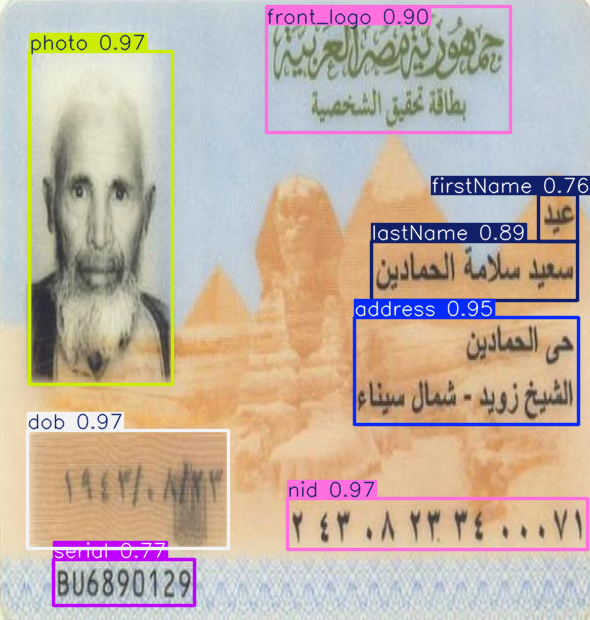

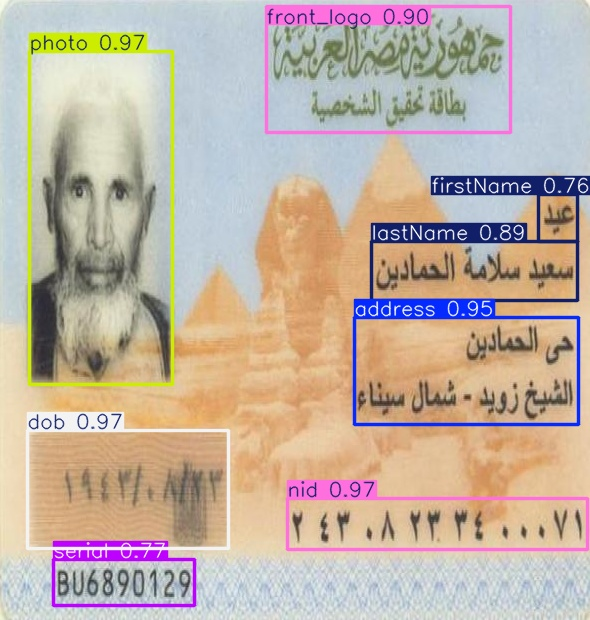

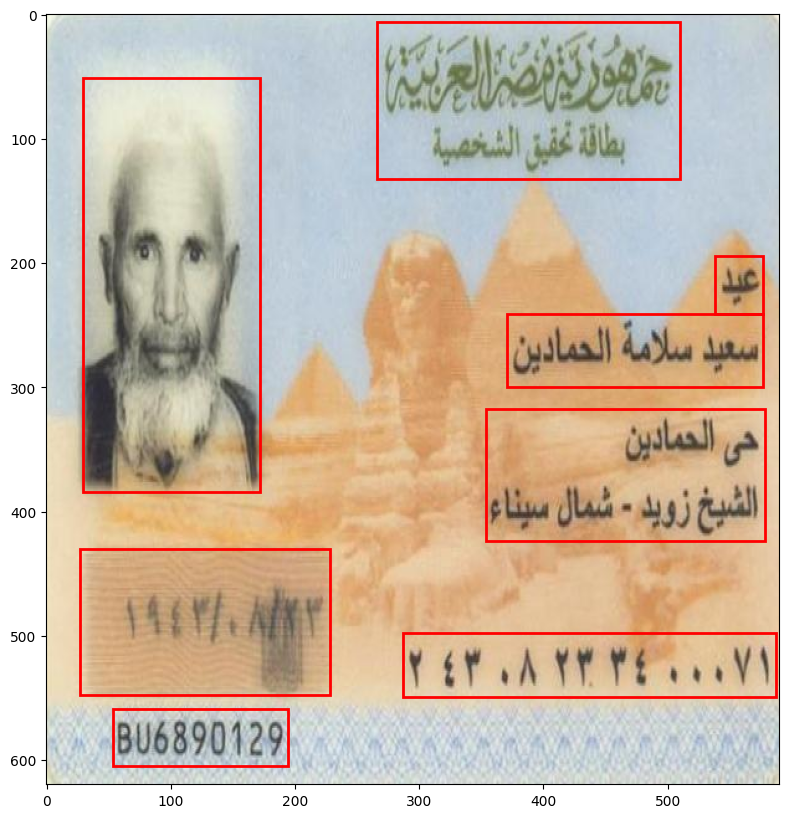


0: 192x640 4 0s, 1 1, 2 2s, 3 3s, 2 4s, 1 7, 1 8, 43.6ms
Speed: 1.2ms preprocess, 43.6ms inference, 1.3ms postprocess per image at shape (1, 3, 192, 640)


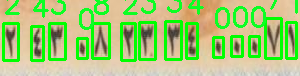

First Name: عيد
Second Name: سعيد سلامة الحمادين
Full Name: عيد سعيد سلامة الحمادين
National ID: 24308233400071
Address: الحمادين
‎ ‏ 
الشبغ زويد - سمال سبناء
Serial: BU6890129
Birth Date: 1943-08-23
Governorate: North Sinai
Gender: Male


In [39]:

# Function to preprocess the cropped image
def preprocess_image(cropped_image):
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    return binary

# Functions for specific fields with custom OCR configurations
def extract_text(image, bbox, lang='ara'):
    x1, y1, x2, y2 = bbox
    cropped_image = image[y1:y2, x1:x2]
    preprocessed_image = preprocess_image(cropped_image)
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(preprocessed_image, lang=lang, config=custom_config)
    return text.strip()

# Function to detect national ID numbers in a cropped image
def detect_national_id(cropped_image):
    model = YOLO('/content/Detect ID Numbers.pt')  # Load the model directly in the function
    results = model(cropped_image)
    detected_info = []

    for result in results:
        for box in result.boxes:
            cls = int(box.cls)
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            detected_info.append((cls, x1))
            cv2.rectangle(cropped_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(cropped_image, str(cls), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    detected_info.sort(key=lambda x: x[1])
    id_number = ''.join([str(cls) for cls, _ in detected_info])

    cv2_imshow(cropped_image)
    return id_number

# Function to remove numbers from a string
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Function to plot image with bounding boxes
def plot_image_with_boxes(image, boxes):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax = plt.gca()
    for box in boxes:
        x1, y1, x2, y2 = [int(coord) for coord in box]
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
    plt.show()

# Function to expand bounding box height only
def expand_bbox_height(bbox, scale=1.2, image_shape=None):
    x1, y1, x2, y2 = bbox
    width = x2 - x1
    height = y2 - y1
    center_x = x1 + width // 2
    center_y = y1 + height // 2
    new_height = int(height * scale)
    new_y1 = max(center_y - new_height // 2, 0)
    new_y2 = min(center_y + new_height // 2, image_shape[0])
    return [x1, new_y1, x2, new_y2]

# Function to process the cropped image
def process_image(cropped_image):
    # Load the trained YOLO model for objects (fields) detection
    model = YOLO('/content/Detect objects.pt')
    results = model(cropped_image)

    # Variables to store extracted values
    first_name = ''
    second_name = ''
    merged_name = ''
    nid = ''
    address = ''
    serial = ''

    # Loop through the results
    for result in results:
        result.show()  # Shows the image with bounding boxes
        output_path = '/content/d2.jpg'
        result.save(output_path)
        display(Image(filename=output_path))

        boxes = [box.xyxy[0].tolist() for box in result.boxes]
        plot_image_with_boxes(cropped_image, boxes)

        for box in result.boxes:
            bbox = box.xyxy[0].tolist()
            class_id = int(box.cls[0].item())
            class_name = result.names[class_id]
            bbox = [int(coord) for coord in bbox]

            if class_name == 'firstName':
                first_name = extract_text(cropped_image, bbox, lang='ara')
            elif class_name == 'lastName':
                second_name = extract_text(cropped_image, bbox, lang='ara')
            elif class_name == 'serial':
                serial = extract_text(cropped_image, bbox, lang='eng')
            elif class_name == 'address':
                address = extract_text(cropped_image, bbox, lang='ara')
                address = remove_numbers(address)
            elif class_name == 'nid':
                expanded_bbox = expand_bbox_height(bbox, scale=1.5, image_shape=cropped_image.shape)
                cropped_nid = cropped_image[expanded_bbox[1]:expanded_bbox[3], expanded_bbox[0]:expanded_bbox[2]]
                nid = detect_national_id(cropped_nid)

    merged_name = f"{first_name} {second_name}"
    print(f"First Name: {first_name}")
    print(f"Second Name: {second_name}")
    print(f"Full Name: {merged_name}")
    print(f"National ID: {nid}")
    print(f"Address: {address}")
    print(f"Serial: {serial}")

    decoded_info = decode_egyptian_id(nid)
    for key, value in decoded_info.items():
        print(f"{key}: {value}")

# Function to decode the Egyptian ID number
def decode_egyptian_id(id_number):
    governorates = {
        '01': 'Cairo',
        '02': 'Alexandria',
        '03': 'Port Said',
        '04': 'Suez',
        '11': 'Damietta',
        '12': 'Dakahlia',
        '13': 'Ash Sharqia',
        '14': 'Kaliobeya',
        '15': 'Kafr El - Sheikh',
        '16': 'Gharbia',
        '17': 'Monoufia',
        '18': 'El Beheira',
        '19': 'Ismailia',
        '21': 'Giza',
        '22': 'Beni Suef',
        '23': 'Fayoum',
        '24': 'El Menia',
        '25': 'Assiut',
        '26': 'Sohag',
        '27': 'Qena',
        '28': 'Aswan',
        '29': 'Luxor',
        '31': 'Red Sea',
        '32': 'New Valley',
        '33': 'Matrouh',
        '34': 'North Sinai',
        '35': 'South Sinai',
        '88': 'Foreign'
    }

    if len(id_number) != 14:
        raise ValueError("ID number must be 14 digits long")

    century_digit = int(id_number[0])
    year = int(id_number[1:3])
    month = int(id_number[3:5])
    day = int(id_number[5:7])
    governorate_code = id_number[7:9]
    gender_code = int(id_number[12:13])

    if century_digit == 2:
        century = "1900-1999"
        full_year = 1900 + year
    elif century_digit == 3:
        century = "2000-2099"
        full_year = 2000 + year
    else:
        raise ValueError("Invalid century digit")

    gender = "Male" if gender_code % 2 != 0 else "Female"
    governorate = governorates.get(governorate_code, "Unknown")
    birth_date = f"{full_year:04d}-{month:02d}-{day:02d}"

    return {
        'Birth Date': birth_date,
        'Governorate': governorate,
        'Gender': gender
    }

# Function to detect the ID card and pass it to the existing code
def detect_and_process_id_card(image_path):
    # Load the ID card detection model
    id_card_model = YOLO('/content/Detect ID Card.pt')

    # Perform inference to detect the ID card
    id_card_results = id_card_model(image_path)

    # Load the original image using OpenCV
    image = cv2.imread(image_path)

    # Crop the ID card from the image
    for result in id_card_results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            cropped_image = image[y1:y2, x1:x2]

    # Pass the cropped image to the existing processing function
    process_image(cropped_image)

# Example usage: Upload an image from your local device
uploaded = files.upload()  # Upload the image

for filename in uploaded.keys():
    detect_and_process_id_card(filename)  # Use the uploaded image


In [40]:
"""https://github.com/keronagy/Egyptian-ID-Data-Extraction
this project is Extract name, address and ID number from the ID images but don't mesioned the accuracy """

SyntaxError: incomplete input (<ipython-input-40-644d6c2fe860>, line 1)